In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
sc.settings.set_figure_params(dpi=100)

In [5]:
# read in the levenshtein distance for the epitope information
df_l = pd.read_csv('../outputs/model_v3/full.epitope.levenshtein.csv', index_col=0)

[Text(0.5, 0, 'Levenshtein Distance'), Text(0, 0.5, 'Count')]

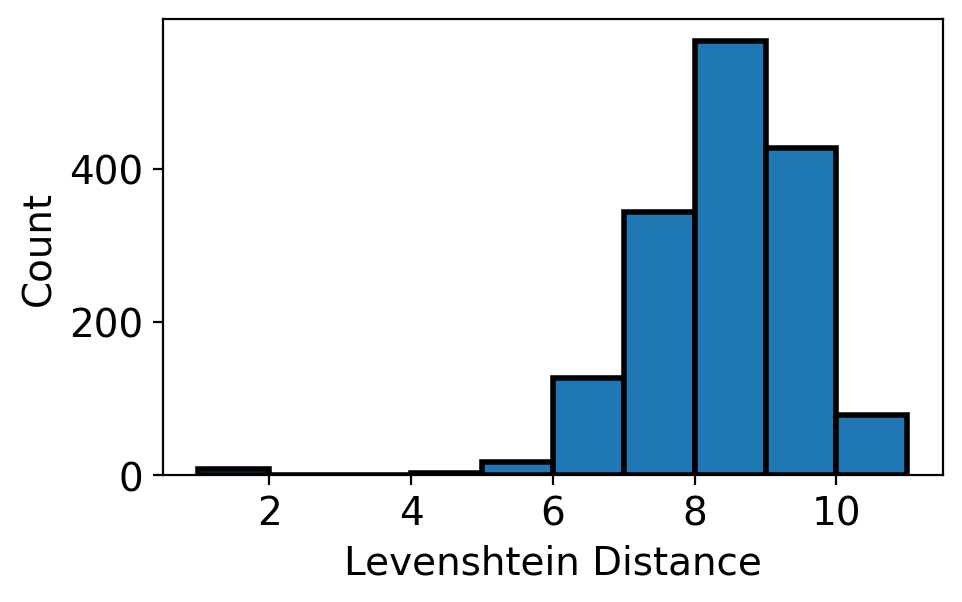

In [6]:
# check the levenshtein distance
fig, ax = plt.subplots(figsize=[5, 3])
ax.grid(False)
ax.hist(df_l.loc['NLVPMVATV'][df_l.loc['NLVPMVATV'] > 0], linewidth=2, edgecolor='k', width=1)
ax.set(xlabel='Levenshtein Distance', ylabel='Count')

In [7]:
# we'll read both of these values and the original input and irrelevant tcrs
cdr3_to_X = pd.read_csv('../outputs/model_v3/cdr3.conversion.n30.csv', index_col=0)
ag_to_X = pd.read_csv('../outputs/model_v3/epitope.conversion.n15.csv', index_col=0)
hit = pd.read_csv('../outputs/model_v3/full.input.X.csv', index_col=0)
irr = pd.read_csv('../outputs/model_v3/full.control.X.csv', index_col=0)
irr = irr.reset_index().iloc[:, 1:]

In [8]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve, auc, accuracy_score
from tqdm import tqdm

%load_ext tensorboard

2024-01-03 15:27:58.039577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-03 15:27:58.217106: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 15:27:58.987948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-03 15:27:58.988060: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [9]:
# save the original hit and irr
hit_orig, irr_orig = hit.copy(), irr.copy()

4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 6ms/step - loss: 0.6576 - accuracy: 0.6020 - auc: 0.6450 - val_loss: 0.6474 - val_accuracy: 0.6193 - val_auc: 0.6854
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6126 - accuracy: 0.6505 - auc: 0.7161 - val_loss: 0.6464 - val_accuracy: 0.6067 - val_auc: 0.6986
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5815 - accuracy: 0.6732 - auc: 0.7482 - val_loss: 0.6117 - val_accuracy: 0.6464 - val_auc: 0.7077
Epoch 4/10
260/260 [==============================] - 1s 5ms/step - loss: 0.5539 - accuracy: 0.6911 - auc: 0.7758 - val_loss: 0.6011 - val_accuracy: 0.6490 - val_auc: 0.7262
Epoch 5/10
260/260 [==============================] - 1s 5ms/step - loss: 0.5313 - accuracy: 0.7172 - auc: 0.7993 - val_loss: 0.6111 - val_accuracy: 0.6497 - val_auc: 0.7330
Epoch 6/10
260/260 [==============================] - 1s 5ms/step - loss: 0.5060 - accuracy: 0.7320 - auc: 0.8

260/260 [==============================] - 1s 4ms/step - loss: 0.5007 - accuracy: 0.7397 - auc: 0.8277 - val_loss: 0.6162 - val_accuracy: 0.6555 - val_auc: 0.7317
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4763 - accuracy: 0.7578 - auc: 0.8474 - val_loss: 0.6176 - val_accuracy: 0.6627 - val_auc: 0.7400
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4492 - accuracy: 0.7791 - auc: 0.8669 - val_loss: 0.6296 - val_accuracy: 0.6609 - val_auc: 0.7416
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4121 - accuracy: 0.7953 - auc: 0.8920 - val_loss: 0.6365 - val_accuracy: 0.6743 - val_auc: 0.7486
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6565 - accuracy: 0.6083 - auc: 0.6539 - val_loss: 0.6411 - val_accuracy: 0.6150 - val_auc: 0.6799
Epoch 2/10
260/260 [==============================] - 

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6667 - accuracy: 0.5827 - auc: 0.6229 - val_loss: 0.6481 - val_accuracy: 0.6045 - val_auc: 0.6786
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6126 - accuracy: 0.6465 - auc: 0.7135 - val_loss: 0.6225 - val_accuracy: 0.6363 - val_auc: 0.6989
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5781 - accuracy: 0.6747 - auc: 0.7493 - val_loss: 0.6189 - val_accuracy: 0.6157 - val_auc: 0.7100
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5491 - accuracy: 0.7011 - auc: 0.7813 - val_loss: 0.6188 - val_accuracy: 0.6377 - val_auc: 0.7138
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5213 - accuracy: 0.7185 - auc: 0.8076 - val_loss: 0.6312 - val_accuracy: 0.6508 - val_auc: 0.7171
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5008 - accuracy: 0.7398 - auc: 0.8266 - val_loss: 0.62

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5012 - accuracy: 0.7363 - auc: 0.8258 - val_loss: 0.6157 - val_accuracy: 0.6620 - val_auc: 0.7323
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.7613 - auc: 0.8515 - val_loss: 0.6203 - val_accuracy: 0.6587 - val_auc: 0.7331
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4421 - accuracy: 0.7830 - auc: 0.8722 - val_loss: 0.6374 - val_accuracy: 0.6620 - val_auc: 0.7380
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4055 - accuracy: 0.8056 - auc: 0.8958 - val_loss: 0.6562 - val_accuracy: 0.6645 - val_auc: 0.7382
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6608 - accuracy: 0.5934 - auc: 0.6372 - val_loss: 0.6402 - val_accuracy: 0.6327 - val_auc: 0.6871
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6591 - accuracy: 0.6048 - auc: 0.6490 - val_loss: 0.6405 - val_accuracy: 0.6258 - val_auc: 0.6910
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6191 - accuracy: 0.6490 - auc: 0.7096 - val_loss: 0.6272 - val_accuracy: 0.6294 - val_auc: 0.7003
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5854 - accuracy: 0.6690 - auc: 0.7448 - val_loss: 0.6097 - val_accuracy: 0.6403 - val_auc: 0.7133
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5579 - accuracy: 0.6919 - auc: 0.7725 - val_loss: 0.6003 - val_accuracy: 0.6540 - val_auc: 0.7262
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5351 - accuracy: 0.7068 - auc: 0.7949 - val_loss: 0.6007 - val_accuracy: 0.6591 - val_auc: 0.7325
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5084 - accuracy: 0.7295 - auc: 0.8205 - val_loss: 0.61

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5237 - accuracy: 0.7256 - auc: 0.8120 - val_loss: 0.6414 - val_accuracy: 0.6327 - val_auc: 0.7044
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4904 - accuracy: 0.7548 - auc: 0.8400 - val_loss: 0.6601 - val_accuracy: 0.6273 - val_auc: 0.7069
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4538 - accuracy: 0.7783 - auc: 0.8667 - val_loss: 0.6709 - val_accuracy: 0.6428 - val_auc: 0.7116
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4074 - accuracy: 0.8068 - auc: 0.8965 - val_loss: 0.6947 - val_accuracy: 0.6367 - val_auc: 0.7093
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6725 - accuracy: 0.5770 - auc: 0.6137 - val_loss: 0.6462 - val_accuracy: 0.6294 - val_auc: 0.6808
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6682 - accuracy: 0.5816 - auc: 0.6234 - val_loss: 0.6455 - val_accuracy: 0.6265 - val_auc: 0.6703
Epoch 2/10
260/260 [==============================] - 1s 5ms/step - loss: 0.6260 - accuracy: 0.6393 - auc: 0.6997 - val_loss: 0.6403 - val_accuracy: 0.6135 - val_auc: 0.6667
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5975 - accuracy: 0.6587 - auc: 0.7312 - val_loss: 0.6362 - val_accuracy: 0.6204 - val_auc: 0.6876
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5708 - accuracy: 0.6839 - auc: 0.7606 - val_loss: 0.6183 - val_accuracy: 0.6406 - val_auc: 0.6999
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5489 - accuracy: 0.6984 - auc: 0.7828 - val_loss: 0.6459 - val_accuracy: 0.6320 - val_auc: 0.7158
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5231 - accuracy: 0.7209 - auc: 0.8078 - val_loss: 0.63

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5395 - accuracy: 0.7137 - auc: 0.7950 - val_loss: 0.6388 - val_accuracy: 0.6265 - val_auc: 0.6925
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5095 - accuracy: 0.7368 - auc: 0.8233 - val_loss: 0.6496 - val_accuracy: 0.6298 - val_auc: 0.6936
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4742 - accuracy: 0.7650 - auc: 0.8516 - val_loss: 0.6707 - val_accuracy: 0.6323 - val_auc: 0.6949
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4353 - accuracy: 0.7916 - auc: 0.8793 - val_loss: 0.6959 - val_accuracy: 0.6363 - val_auc: 0.6924
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 6ms/step - loss: 0.6807 - accuracy: 0.5678 - auc: 0.5972 - val_loss: 0.6648 - val_accuracy: 0.6074 - val_auc: 0.6457
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 6ms/step - loss: 0.6746 - accuracy: 0.5805 - auc: 0.6134 - val_loss: 0.6599 - val_accuracy: 0.6045 - val_auc: 0.6554
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6344 - accuracy: 0.6342 - auc: 0.6888 - val_loss: 0.6517 - val_accuracy: 0.6132 - val_auc: 0.6622
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6075 - accuracy: 0.6540 - auc: 0.7208 - val_loss: 0.6516 - val_accuracy: 0.6106 - val_auc: 0.6644
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5832 - accuracy: 0.6744 - auc: 0.7475 - val_loss: 0.6461 - val_accuracy: 0.6208 - val_auc: 0.6728
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5606 - accuracy: 0.6859 - auc: 0.7698 - val_loss: 0.6453 - val_accuracy: 0.6208 - val_auc: 0.6812
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5328 - accuracy: 0.7068 - auc: 0.7977 - val_loss: 0.65

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5365 - accuracy: 0.7128 - auc: 0.7964 - val_loss: 0.6556 - val_accuracy: 0.6294 - val_auc: 0.6914
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5058 - accuracy: 0.7370 - auc: 0.8237 - val_loss: 0.6629 - val_accuracy: 0.6443 - val_auc: 0.6985
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4658 - accuracy: 0.7679 - auc: 0.8564 - val_loss: 0.7063 - val_accuracy: 0.6399 - val_auc: 0.6987
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4259 - accuracy: 0.7930 - auc: 0.8844 - val_loss: 0.7120 - val_accuracy: 0.6392 - val_auc: 0.7022
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6735 - accuracy: 0.5887 - auc: 0.6177 - val_loss: 0.6646 - val_accuracy: 0.5879 - val_auc: 0.6381
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6730 - accuracy: 0.5794 - auc: 0.6153 - val_loss: 0.6675 - val_accuracy: 0.5879 - val_auc: 0.6531
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6382 - accuracy: 0.6312 - auc: 0.6850 - val_loss: 0.6485 - val_accuracy: 0.6142 - val_auc: 0.6632
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6047 - accuracy: 0.6657 - auc: 0.7280 - val_loss: 0.6399 - val_accuracy: 0.6247 - val_auc: 0.6779
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5821 - accuracy: 0.6778 - auc: 0.7508 - val_loss: 0.6366 - val_accuracy: 0.6294 - val_auc: 0.6914
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5543 - accuracy: 0.7005 - auc: 0.7810 - val_loss: 0.6289 - val_accuracy: 0.6349 - val_auc: 0.7033
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5276 - accuracy: 0.7220 - auc: 0.8063 - val_loss: 0.62

260/260 [==============================] - 1s 4ms/step - loss: 0.5303 - accuracy: 0.7219 - auc: 0.8016 - val_loss: 0.6589 - val_accuracy: 0.6240 - val_auc: 0.6877
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4981 - accuracy: 0.7444 - auc: 0.8307 - val_loss: 0.6514 - val_accuracy: 0.6352 - val_auc: 0.6911
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4658 - accuracy: 0.7644 - auc: 0.8565 - val_loss: 0.6736 - val_accuracy: 0.6222 - val_auc: 0.6840
Epoch 9/10
260/260 [==============================] - 1s 5ms/step - loss: 0.4206 - accuracy: 0.8022 - auc: 0.8889 - val_loss: 0.7172 - val_accuracy: 0.6309 - val_auc: 0.6903
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
0.7283459748945071 0.14903597606842572 0.5950379609544469 0.08150676081733209


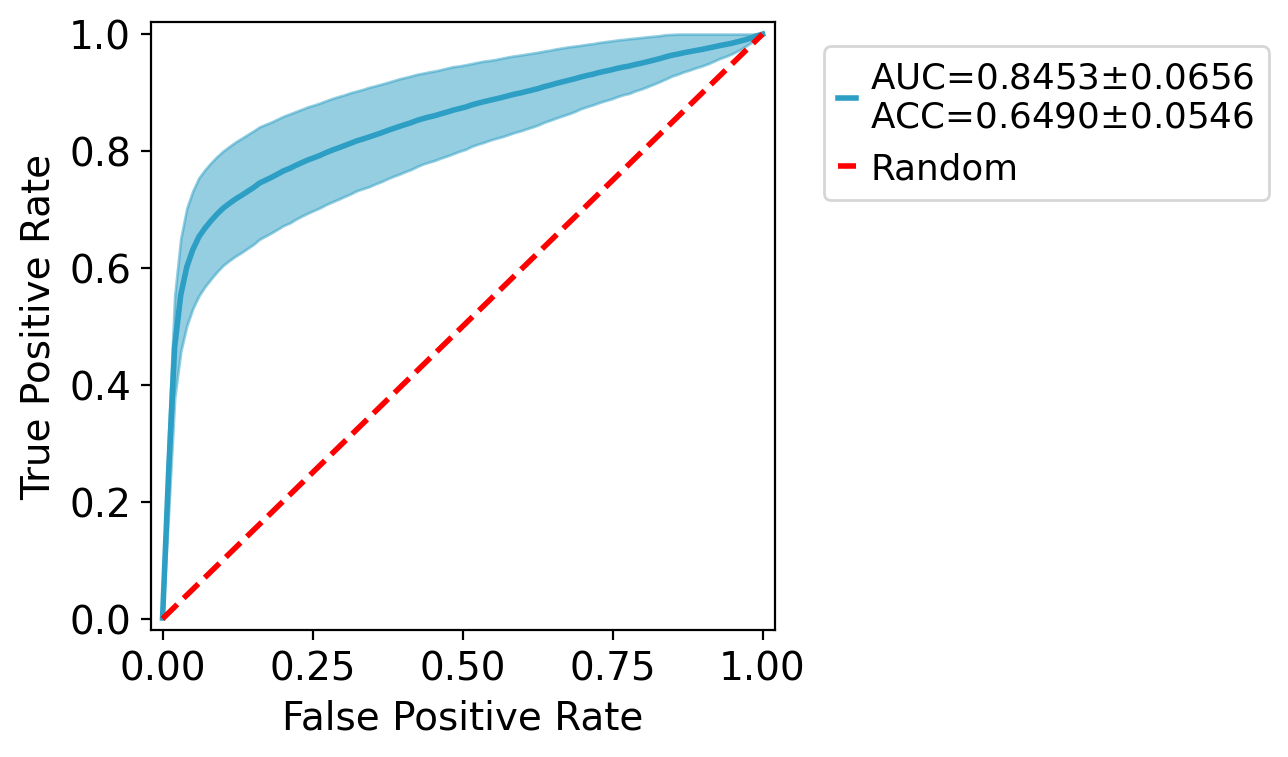

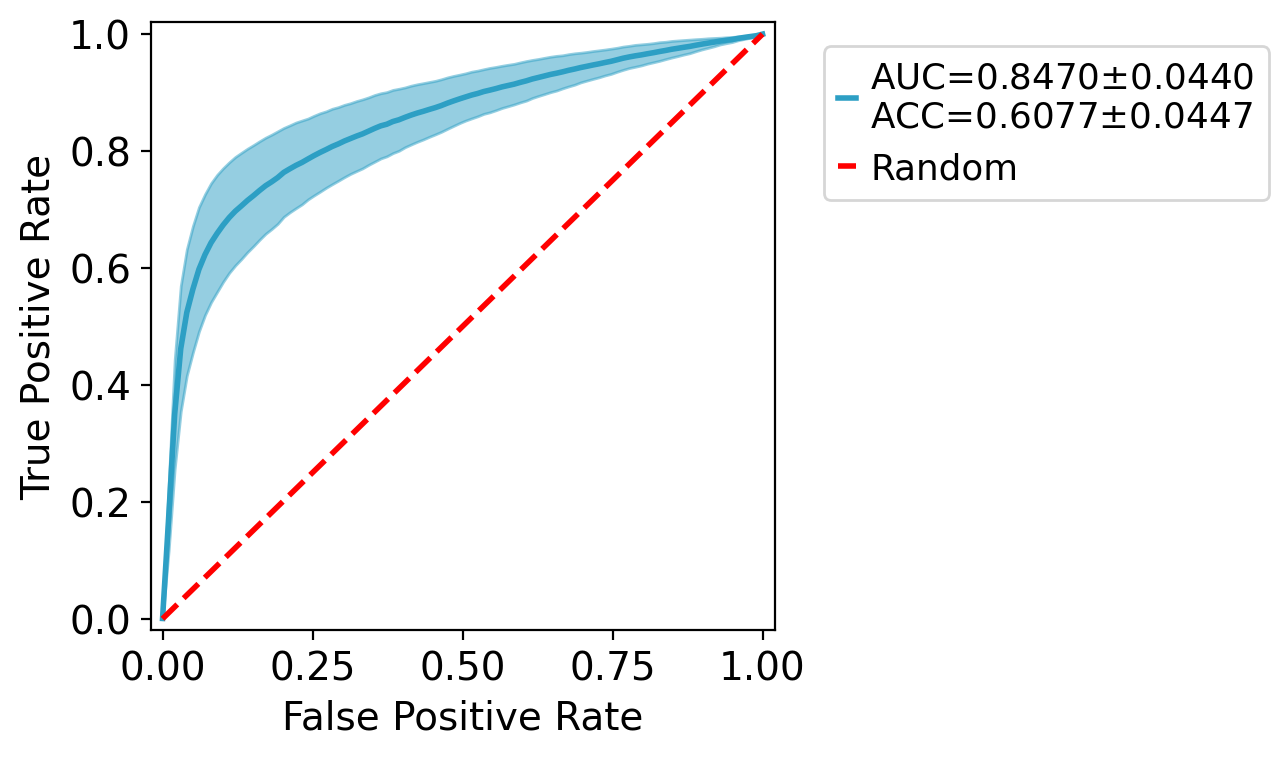

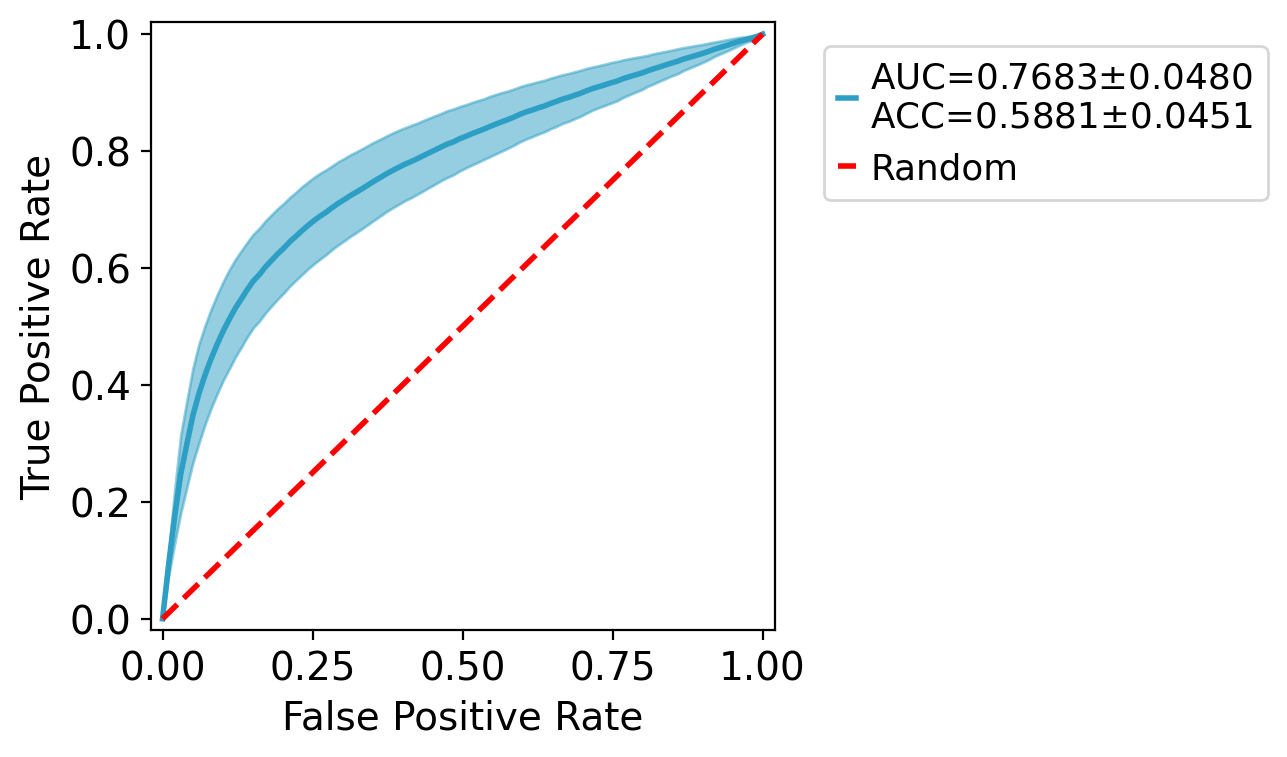

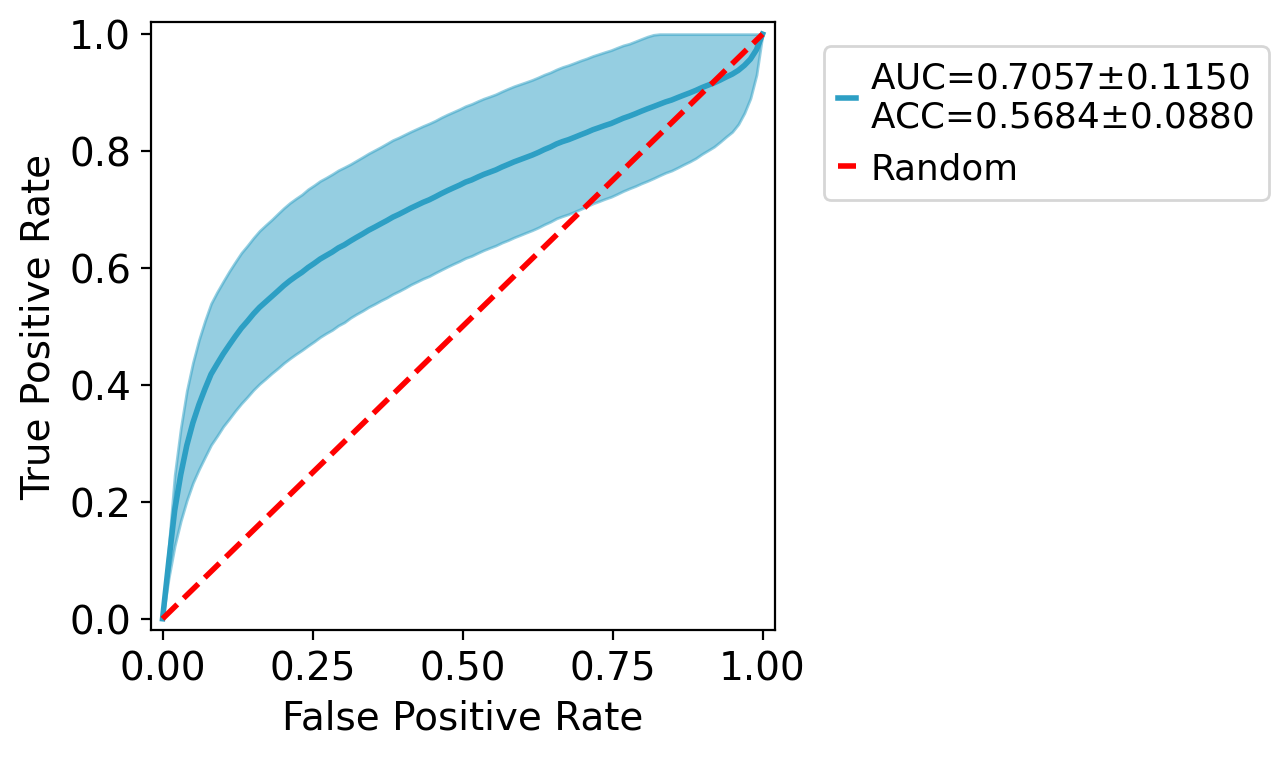

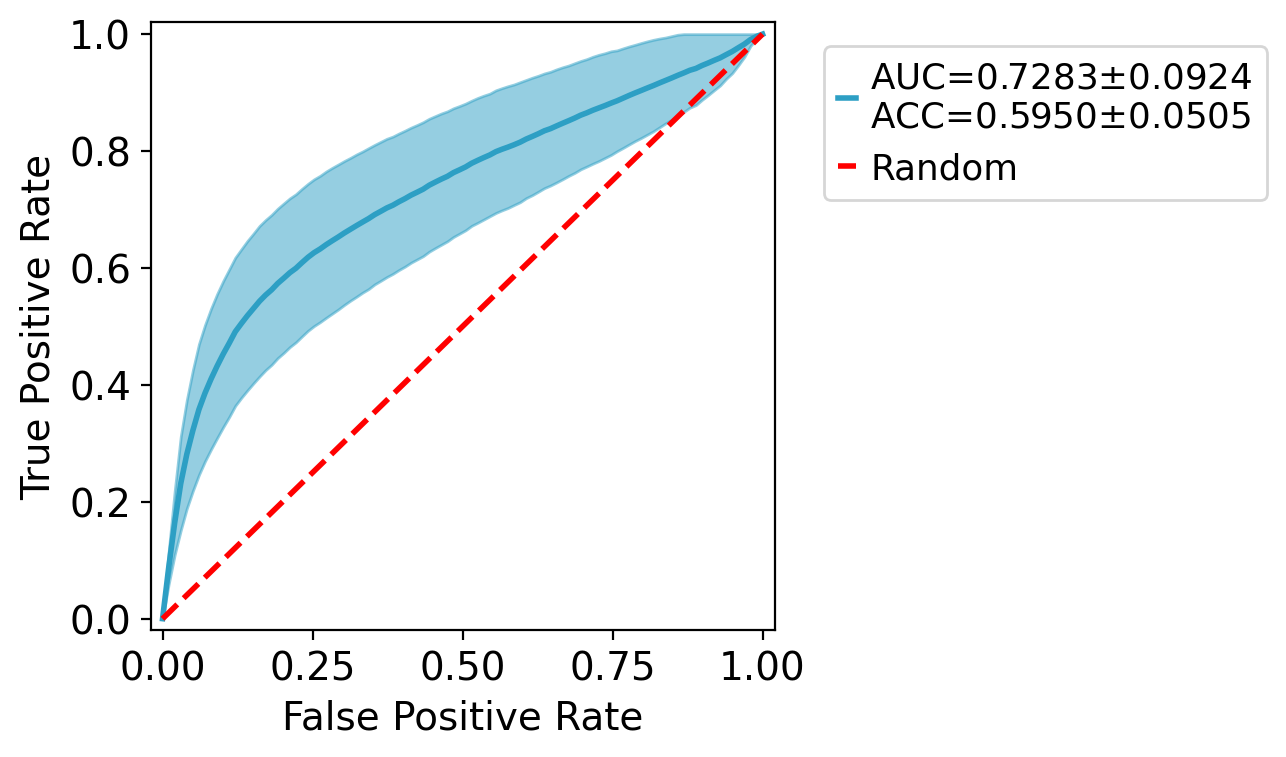

In [12]:
# check all possible levenshteins
vmax2stats = {}
for vmax in range(6, 11):
    # set seed and identify irrelevant matches
    np.random.seed(0)
    
    # now retrieve the the temporary hit and irr
    hit, irr = hit_orig.copy(), irr_orig.copy()
    # strict cutoff method
    valid_peptides = df_l.index[(df_l['NLVPMVATV'] <= vmax) | (df_l.index <= 'NLVPMVATV')]
    hit = hit.loc[hit['Epitope'].isin(valid_peptides)].reset_index().iloc[:, 1:]
    irr = irr.loc[irr['Epitope'].isin(valid_peptides)].reset_index().iloc[:, 1:]
    # resubset irr to be the same size as hit
    if irr.shape[0] != hit.shape[0]:
        need_replace = hit.shape[0] > irr.shape[0]
        valid_idxs = np.random.choice(irr.index, replace=need_replace, size=hit.shape[0])
        irr = irr.loc[valid_idxs].reset_index().iloc[:, 1:]
    
    # assemble hold out
    df_ext_X_hit = hit_orig.loc[hit_orig['Epitope'] == 'NLVPMVATV']
    df_ext_X_irr = irr_orig.loc[irr_orig['Epitope'] == 'NLVPMVATV']
    df_ext_y = pd.concat([pd.Series(np.ones(df_ext_X_hit.shape[0]), index=df_ext_X_hit),
                          pd.Series(np.zeros(df_ext_X_irr.shape[0]), index=df_ext_X_irr)], axis=0)
    df_ext_X = pd.concat([df_ext_X_hit, df_ext_X_irr], axis=0).reset_index().iloc[:, 1:]
    df_ext_y = df_ext_y.reset_index().iloc[:, 1]
    
    # retrieve values and aucs
    fprs, tprs, aucs, accs = [], [], [], []

    # complete 10 iterations
    for seed in range(10):
        ## SETUP CONSTANTS
        # grab a subset
        np.random.seed(seed)

        ## SEPARATE OUT TRAINING AND TESTING
        # disqualify peptides from hit and irr
        # define masks to ensure we only use non NLV specific CDR3s
        mask_hit = ~(hit['CDR3'].isin(df_ext_X['CDR3']) | hit['Epitope'].isin(df_ext_X['Epitope']))
        mask_irr = ~(irr['CDR3'].isin(df_ext_X['CDR3']) | irr['Epitope'].isin(df_ext_X['Epitope']))
        # use masks to determine size
        n_rows = df_ext_X_hit.shape[0]
        perc_train = 0.75
        
        # train and test
        # > subset target
        need_replace = n_rows > hit[mask_hit].shape[0]
        idxs = np.random.choice(hit.index[mask_hit], size=n_rows, replace=need_replace)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        print(len(idxs), len(idys))
        hit_train, hit_test = hit.loc[idxs], hit.loc[idys]
        # > subset control
        need_replace = n_rows > hit[mask_irr].shape[0]
        idxs = np.random.choice(irr.index[mask_irr], size=n_rows, replace=need_replace)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        print(len(idxs), len(idys))
        irr_train, irr_test = irr.loc[idxs], irr.loc[idys]
        # confirm no overlap
        assert not hit_train.index.isin(hit_test.index).all()
        assert not irr_train.index.isin(irr_test.index).all()


        ## CONVERT TO CORRECT FORMAT
        # create X for training
        X_train = pd.concat([hit_train, irr_train], axis=0).reset_index().iloc[:, 1:]
        X_train_cdr3s = cdr3_to_X.loc[X_train['CDR3']].reset_index().iloc[:, 1:]
        X_train_epitopes = ag_to_X.loc[X_train['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_train_cdr3s.columns = 'cdr3:' + X_train_cdr3s.columns
        X_train_epitopes.columns = 'ag:' + X_train_epitopes.columns
        X_train = X_train_cdr3s.join(X_train_epitopes)

        # grab y for training
        y_train = pd.concat([pd.Series(np.ones(hit_train.shape[0])),
                             pd.Series(np.zeros(irr_train.shape[0]))], axis=0).astype(int)
        y_train = y_train.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_train.shape[0] == y_train.shape[0]

        # create X for testing
        X_test = pd.concat([hit_test, irr_test], axis=0).reset_index().iloc[:, 1:]
        X_test_cdr3s = cdr3_to_X.loc[X_test['CDR3']].reset_index().iloc[:, 1:]
        X_test_epitopes = ag_to_X.loc[X_test['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_test_cdr3s.columns = 'cdr3:' + X_test_cdr3s.columns
        X_test_epitopes.columns = 'ag:' + X_test_epitopes.columns
        X_test = X_test_cdr3s.join(X_test_epitopes)

        # grab y for testing
        y_test = pd.concat([pd.Series(np.ones(hit_test.shape[0])),
                             pd.Series(np.zeros(irr_test.shape[0]))], axis=0).astype(int)
        y_test = y_test.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_test.shape[0] == y_test.shape[0]

        # create X for validation
        X_val = df_ext_X.copy().reset_index().iloc[:, 1:]
        X_val_cdr3s = cdr3_to_X.loc[X_val['CDR3']].reset_index().iloc[:, 1:]
        X_val_epitopes = ag_to_X.loc[X_val['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_val_cdr3s.columns = 'cdr3:' + X_val_cdr3s.columns
        X_val_epitopes.columns = 'ag:' + X_val_epitopes.columns
        X_val = X_val_cdr3s.join(X_val_epitopes)
        # grab y for validation
        y_val = df_ext_y.copy().reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_val.shape[0] == y_val.shape[0]

        # remove constant columns
        X_train = X_train.loc[:, X_train.nunique(0) > 1]
        X_train = X_train.loc[:, X_train.sum(0) > 0]
        # read in normalization factors
        means = X_train.mean(0)
        stds = (X_train - means).std(0)
        # subset for relevant columns
        X_train = X_train[means.index]
        X_test = X_test[means.index]
        X_val = X_val[means.index]
        # normalize
        X_train -= means
        X_train /= stds
        X_test -= means
        X_test /= stds
        X_val -= means
        X_val /= stds

        ## SETUP MODEL
        # retrieve the appropriate columns
        cols_cdr3 = X_val.columns[X_val.columns.str.startswith('cdr3')]
        cols_ag = X_val.columns[X_val.columns.str.startswith('ag')]

        # determine model parameters
        # > layer for cdr3 alone
        input_1 = keras.layers.Input(shape=(len(cols_cdr3)))
        output_1 = keras.layers.Dense(200, activation='sigmoid')(input_1)
        # > layer for ag alone
        input_2 = keras.layers.Input(shape=(len(cols_ag)))
        output_2 = keras.layers.Dense(100, activation='sigmoid')(input_2)
        # > combined layer
        concat_3 = keras.layers.Concatenate()([output_1, output_2])
        output_3 = keras.layers.Dense(100, activation='sigmoid')(concat_3)
        # > final logit softmax layer
        output_4 = keras.layers.Dense(1, activation='sigmoid')(output_3)
        model = keras.Model(inputs=[input_1, input_2], outputs=[output_4])
        # set up the training parameters for the model
        model.compile(
            optimizer=keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy','AUC'],
        )
        # train the model
        history = model.fit([X_train[cols_cdr3], X_train[cols_ag]], y_train,
                            epochs=10,
                            validation_data=([X_test[cols_cdr3], X_test[cols_ag]], y_test),
                            workers=40, use_multiprocessing=True)

        # testing predictions
        y_pred = model.predict([X_val[cols_cdr3], X_val[cols_ag]],
                               workers=40, use_multiprocessing=True)[:, 0]
        y_pred = pd.Series(y_pred, index=y_val.index, name='Pred%')
        y_pred = pd.concat([y_pred, y_val], axis=1)

        # retrieve auc metrics
        fpr, tpr, _ = roc_curve(y_pred[0], y_pred['Pred%'])
        fprs.append(fpr.tolist())
        tprs.append(tpr.tolist())
        aucs.append(auc(fpr, tpr))
        accs.append(accuracy_score(y_pred[0], y_pred['Pred%'].apply(round)))

    # create roc auc curve
    fig, ax = plt.subplots(figsize=[4, 4])
    ax.grid(False)
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, color='#2D9FC4', linewidth=2,
            label=r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, color='#2D9FC4', alpha=0.50)
    # plot the random line
    ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
    # add on labels and adjust limits
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    print(np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
    
    # store it up
    vmax2stats[vmax] = fprs, tprs, aucs, accs

In [13]:
import pickle as pkl
with open('tmp.s2.pkl', 'wb') as f:
    pkl.dump(vmax2stats, f)

6 0.845282686769778 0.10583267443608806 0.6490328994938539 0.08812968303465202
7 0.8469608068797385 0.07097875801855216 0.6077096890817065 0.07214064983584054
8 0.7682601137717632 0.07751366983657977 0.5881236442516269 0.0727200870492428
9 0.7057123701239458 0.18552719404950682 0.5684381778741865 0.14197535402758737
10 0.7283459748945071 0.14903597606842572 0.5950379609544469 0.08150676081733209


[Text(0.5, 0, 'False Positive Rate'), Text(0, 0.5, 'True Positive Rate')]

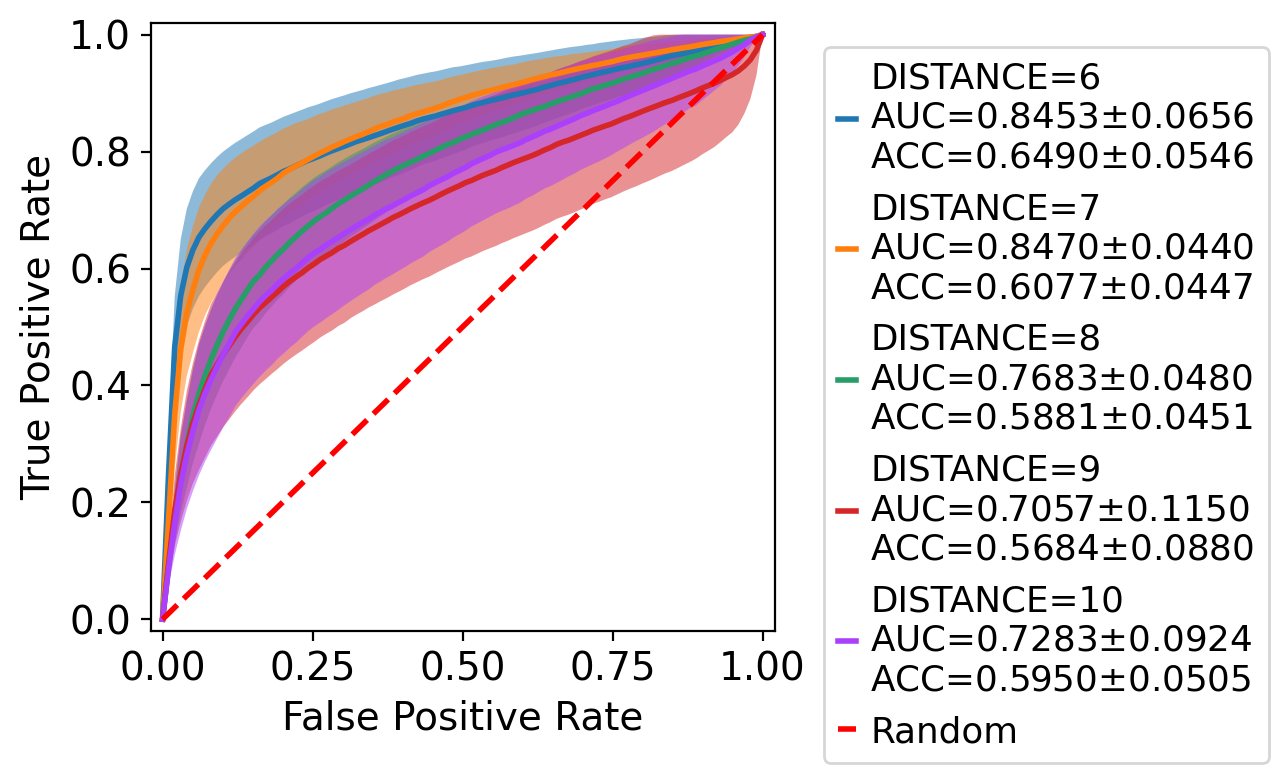

In [14]:
# create roc auc curve
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
for vmax, (fprs, tprs, aucs, accs) in vmax2stats.items():
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, linewidth=2,
            label=f'DISTANCE={vmax}\n' + r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, alpha=0.50)
    print(vmax, np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
# plot the random line
ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
# add on labels and adjust limits
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

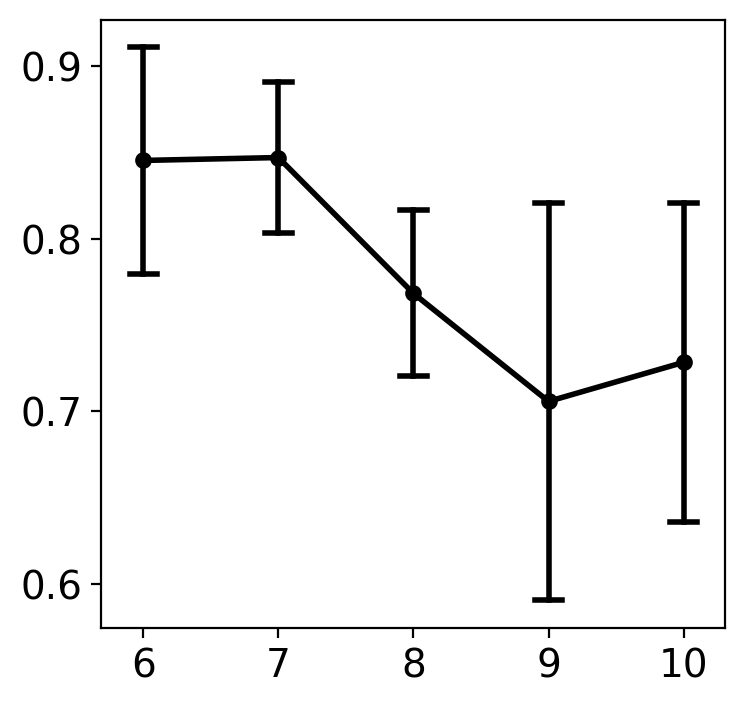

In [15]:
# get the values
xs = list(range(6, 11))
ys_mean = [np.mean(vmax2stats[x][2]) for x in xs]
ys_ci95 = [1.96 * np.std(vmax2stats[x][2]) / np.sqrt(len(vmax2stats[x][2])) for x in xs]
# create the plot
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
ax.scatter(xs, ys_mean, color='k', s=2.5e1)
ax.plot(xs, ys_mean, color='k', lw=2)
# now plot the ci95s
for idx, x in enumerate(xs):
    # retrieve the data
    mean, ci95 = ys_mean[idx], ys_ci95[idx]
    # now plot the ci95
    ax.plot([x]*2, [mean-ci95, mean+ci95], color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean-ci95]*2, color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean+ci95]*2, color='k', lw=2)